<a href="https://colab.research.google.com/github/alirezashirmarz/TimeSeriesAnalysisClass/blob/main/TimeSeriesPlot.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [131]:
## Series Data Visualization Step by step with SHZ with thanking Jason Brownlee
import pandas as pd
import matplotlib.pyplot as plt
series = pd.read_csv('/daily-min-temperatures.txt', header=0, index_col=0, parse_dates=True,squeeze=True) 
                                                    #header: Which row is header 0, 1 , 2 , ...
                                                    #index_col: which column is the row caption
                                                    #sqeeze
                                                    #parse_dates=True ????
print(series.head()) # this print 5 first rows
# This dataset has two colomns (1) Date (2) Minimum Temper of day //header=0, index_col=0, parse_dates=True, squeeze=True
print(series.shape)

Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
Name: Temp, dtype: float64
(3650,)


1. Time Series Line Plot 
x--> Time (Here, it is date)
y--> the value (Here, it is the minimum tempereture of day)

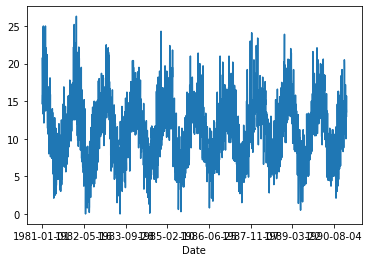

In [123]:
# Simple Line Plot
series.plot()
plt.show()

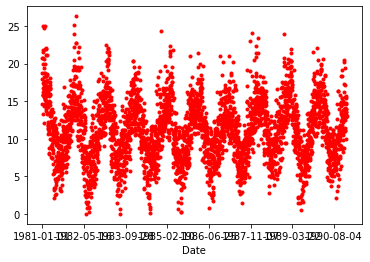

In [124]:
# Line Plot with style=’k.’
# Sometimes it can help to change the style of the line plot; for example, to use a dashed line or dots
series.plot(style='r.') # show plot with . and black color (k is black, r is red, b is blue, g is green)
plt.show()

number of groups: 10


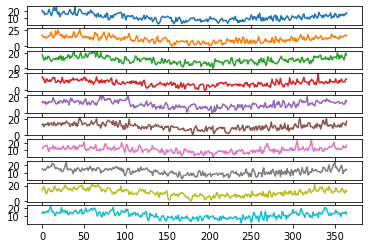

In [177]:
# Group by the Dataset with the year and plot them separately 
from pandas import Grouper       # To make a group 
 
groups= series.groupby(Grouper(freq='A'))  # This is only for Date and can be A B C D
years = pd.DataFrame()                     # Datafrme for years: temperetures
print('number of groups:',len(groups))    # The number of groups
for name,group in groups:
  years[name.year]= group.values
  
years.plot(subplots=True,legend=False)
plt.show()


2. Time Series Histogram and Density Plots

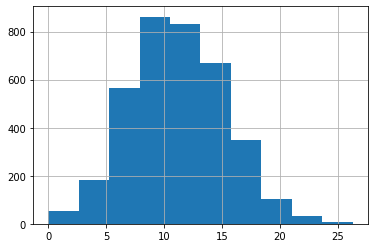

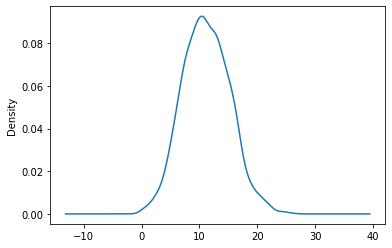

In [174]:
# Series histogram to show the distribution od valuse
series.hist()
plt.show()

# Series distribution line and smooth 
series.plot(kind='kde')
plt.show()

3. Time Series Box and Whisker Plots by Interval

number of groups: 10


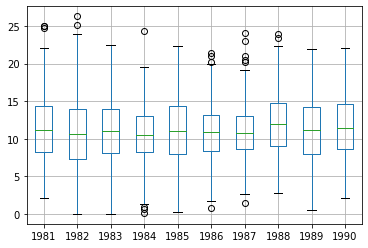

In [175]:
from pandas import Grouper       # To make a group 
 
groups= series.groupby(Grouper(freq='A'))  # This is only for Date and can be A B C D
years = pd.DataFrame()                     # Datafrme for years: temperetures
print('number of groups:',len(groups))    # The number of groups
for name,group in groups:
  years[name.year]= group.values
  
years.boxplot()
plt.show()

number of Groups is:  12
1990-01-31 00:00:00
x0--------> Group of month 01
x1--------> ------- [14.8 13.3 15.6 14.5 14.3 15.3 16.4 14.8 17.4 18.8 22.1 19.  15.5 15.8
 14.7 10.7 11.5 15.  14.5 14.5 13.3 14.3 14.3 20.5 15.  17.1 16.9 16.9
 13.6 16.4 16.1]
----------------------------------------------------------------------------
1990-02-28 00:00:00
x0--------> Group of month 02
x1--------> ------- [12.  12.2 14.8 14.8 14.4 12.9 13.4 15.9 16.1 17.6 15.6 15.  13.  14.1
 17.3 15.7 18.6 12.7 14.  13.7 16.3 20.  17.  15.2 16.5 16.5 17.3 19.1]
----------------------------------------------------------------------------
1990-03-31 00:00:00
x0--------> Group of month 03
x1--------> ------- [19.3 17.3 19.  19.8 19.3 17.2 14.2 10.3 13.  15.3 15.  12.1  9.2 11.
 15.  11.6 11.6 15.1 15.  13.6 12.5 14.3 16.  17.4 16.9 18.  20.6 14.2
 10.9 11.9 13.3]
----------------------------------------------------------------------------
1990-04-30 00:00:00
x0--------> Group of month 04
x1--------> ------- [15.

/usr/local/lib/python3.7/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


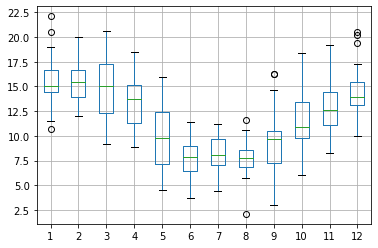

In [225]:
# One Year including 12 month is addressed
# years can be 1981,1982,1983,1984,1985,1986,1987,1988,1989,1990
from pandas.core.frame import DataFrame
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))  # Group contains the name of group [0] and [1] refers to values
print('number of Groups is: ',len(groups))

# This for loop shows the groupby has been done!
for x in groups:
  print(x[0])
  print('x0--------> Group of month', str(x[0]).split('-')[1])
  print('x1-------->','-------',x[1].values)
  print('----------------------------------------------------------------------------')

# Concatinate the values of a group to each column 
months= pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months=DataFrame(months) 
months.columns=range(1,13)
months.boxplot()
plt.show()


4. Time Series Heat Maps

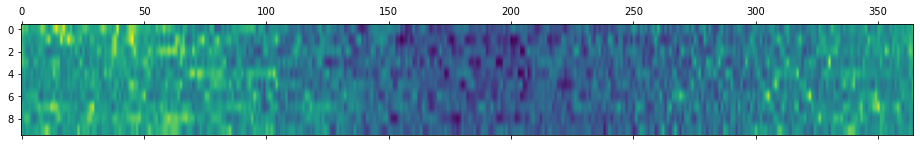

In [227]:
groups = series.groupby(Grouper(freq='A'))
years = DataFrame()
for name, group in groups:
	years[name.year] = group.values
years = years.T
plt.matshow(years, interpolation=None, aspect='auto')
plt.show()

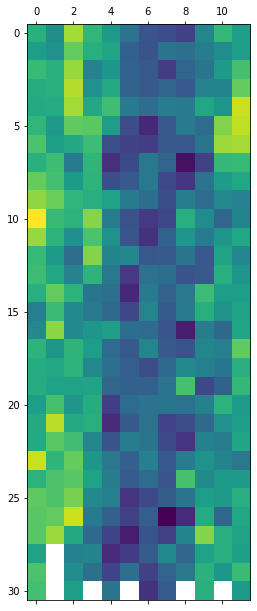

In [230]:
one_year = series['1990']
groups = one_year.groupby(Grouper(freq='M'))
months = pd.concat([pd.DataFrame(x[1].values) for x in groups], axis=1)
months = DataFrame(months)
months.columns = range(1,13)
plt.matshow(months, interpolation=None, aspect='auto')
plt.show()

5. Time Series Lag Scatter Plots 

Time series modeling assumes a relationship between an observation and the previous observation.

A useful type of plot to explore the relationship between each observation and a lag of that observation is called the scatter plot.

Pandas has a built-in function for exactly this called the lag plot. It plots the observation at time t on the x-axis and the lag1 observation (t-1) on the y-axis

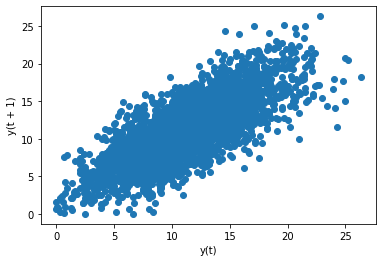

In [231]:
from pandas.plotting import lag_plot
lag_plot(series)
plt.show()

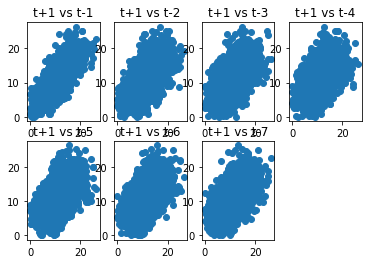

In [234]:
values = DataFrame(series.values)
lags = 7
columns = [values]
for i in range(1,(lags + 1)):
	columns.append(values.shift(i))
dataframe = pd.concat(columns, axis=1)
columns = ['t+1']
for i in range(1,(lags + 1)):
	columns.append('t-' + str(i))
dataframe.columns = columns
plt.figure(1)
for i in range(1,(lags + 1)):
	ax = plt.subplot(240 + i)
	ax.set_title('t+1 vs t-' + str(i))
	plt.scatter(x=dataframe['t+1'].values, y=dataframe['t-'+str(i)].values)
plt.show()

6. Time Series Autocorrelation Plots

We can quantify the strength and type of relationship between observations and their lags.

In statistics, this is called correlation, and when calculated against lag values in time series, it is called autocorrelation (self-correlation).

A correlation value calculated between two groups of numbers, such as observations and their lag1 values, results in a number between -1 and 1. The sign of this number indicates a negative or positive correlation respectively. A value close to zero suggests a weak correlation, whereas a value closer to -1 or 1 indicates a strong correlation.

This type of plot is called an autocorrelation plot and Pandas provides this capability built in, called the autocorrelation_plot() function.

<bound method Series.count of Date
1981-01-01    20.7
1981-01-02    17.9
1981-01-03    18.8
1981-01-04    14.6
1981-01-05    15.8
              ... 
1990-12-27    14.0
1990-12-28    13.6
1990-12-29    13.5
1990-12-30    15.7
1990-12-31    13.0
Name: Temp, Length: 3650, dtype: float64>


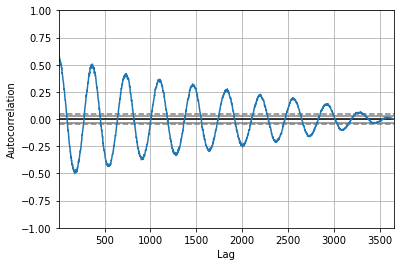

In [239]:
from pandas.plotting import autocorrelation_plot
print(series.count)
autocorrelation_plot(series)
pyplot.show()